In [152]:
from PIL import Image
import numpy as np
import pandas as pd
from copy import deepcopy

In [224]:
image_o = Image.open("letter_o_cpy.png", "r").convert("L")
# image_o = image_o.resize((100,100))

In [227]:
width,height

(580, 751)

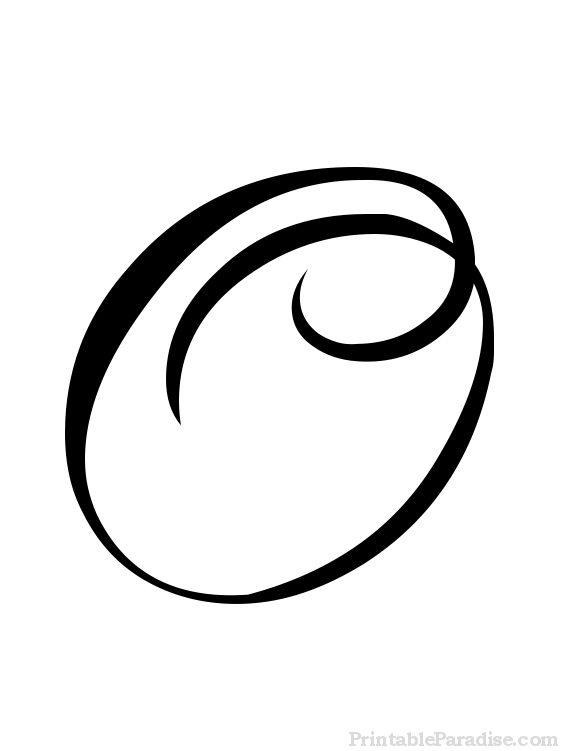

In [237]:
pix = image_o.load()
width,height = image_o.size
pixels = []
for row in range(height):
    row_array = []
    for col in range(width):
        row_array.append(pix[col, row])
    pixels.append(row_array)

# Convert the pixels into an array using numpy
pixels_array = np.array(pixels, dtype=np.uint8)

# Use PIL to create an image from the new array of pixels
Image.fromarray(pixels_array)

In [244]:
dim_filter = 3
# filter = np.array([np.random.random()*100 for i in range(3**2)])
# filter = filter.reshape(-1,3)
filter = np.array([[10,0,-10],[0,1,0],[1,0,1]])
filter

array([[ 10,   0, -10],
       [  0,   1,   0],
       [  1,   0,   1]])

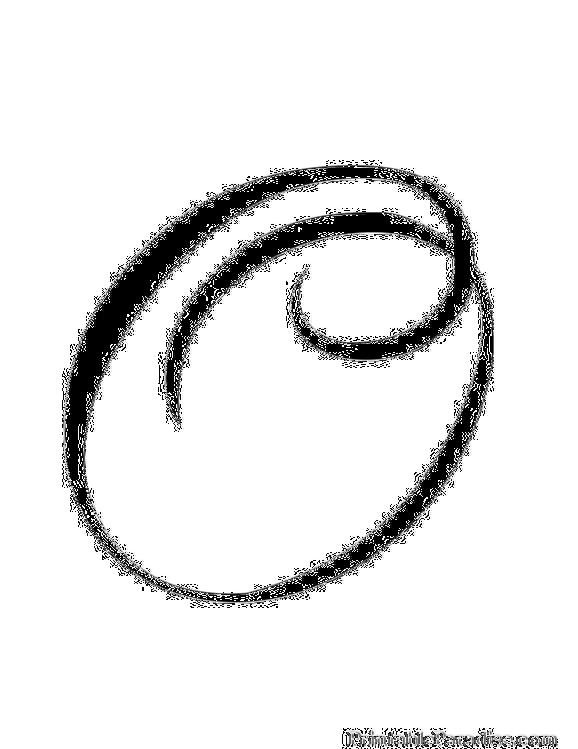

In [245]:
#np array slicing dimension format [row,col]

stride = 1

converted_array = []
for row_start in range(height):
    row_end = row_start+dim_filter

    row_filter_applied = []

    if row_end<=height:
        for col_start in range(width):
            col_end = col_start+dim_filter
            if col_end<=width:
                filter_value = np.sum(filter*pixels_array[row_start:row_end,col_start:col_end])/np.sum(filter)
                row_filter_applied.append(filter_value)
        converted_array.append(row_filter_applied)

Image.fromarray(np.array(converted_array, dtype=np.uint8))
                
